# Integrated Simulations

In [1]:
import os; from os import listdir; from os.path import isfile, join
import re  
from skimage.io import imread
from skimage.exposure import rescale_intensity
import numpy as np 
from tqdm.notebook import tqdm
from timeit import default_timer as timer
import scipy
import pandas as pd
import shutil
import pathlib
import sys
import seaborn as sns
import rsnapsim as rss
import scipy.stats as stats
import matplotlib.pyplot as plt 
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch


In [2]:
plt.style.use("dark_background")

In [3]:
# Defining directories
current_dir = pathlib.Path().absolute()
sequences_dir = current_dir.parents[1].joinpath('DataBases','gene_files')
video_dir = current_dir.parents[1].joinpath('DataBases','videos_for_sim_cell')
rsnaped_dir = current_dir.parents[1].joinpath('rsnaped')
gene_file = current_dir.parents[1].joinpath('DataBases','gene_files','KDM5B_withTags.txt')
masks_dir = current_dir.parents[1].joinpath('DataBases','masks_for_sim_cell')

In [4]:
sequences_dir

PosixPath('/home/luisub/Desktop/rsnaped/DataBases/gene_files')

In [5]:
# Importing rSNAPed
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp

In [6]:
rsp.Banner().print_banner()

 
  ██████╗░░██████╗███╗░░██╗░█████╗░██████╗░███████╗██████╗░ 
  ██╔══██╗██╔════╝████╗░██║██╔══██╗██╔══██╗██╔════╝██╔══██╗ 
  ██████╔╝╚█████╗░██╔██╗██║███████║██████╔╝█████╗░░██║░░██║ 
  ██╔══██╗░╚═══██╗██║╚████║██╔══██║██╔═══╝░██╔══╝░░██║░░██║ 
  ██║░░██║██████╔╝██║░╚███║██║░░██║██║░░░░░███████╗██████╔╝ 
             by : L. Aguilera, T. Stasevich, and B. Munsky 


In [7]:
# These are the parameters that need to be tested. 
number_of_simulated_cells = 1     # PLEASE TEST MIN 1 MAX 10
number_spots_per_cell = 60           # PLEASE TEST MIN 5 MAX 200
simulation_time_in_sec = 200          # PLEASE TEST MIN 10 MAX 100
step_size_in_sec = 1

min_percentage_time_tracking = 0.3   # (normalized) minimum time to consider a trajectory.
average_cell_diameter = 400

In [8]:
diffusion_coefficient = 0.05       # This value must have units of micrometers_square_per_seconds
microns_per_pixel = 0.13

In [9]:
intensity_calculation_method = 'gaussian_fit'  # options are : 'total_intensity' and 'disk_donut' 'gaussian_fit'
mask_selection_method = 'max_area' # options are : 'max_spots' and 'max_area' 
use_optimization_for_tracking = 1 # 0 not using, 1 is using optimization

selected_channel_tracking = 0
selected_channel_segmentation = 1

frame_selection_empty_video = 'gaussian' # Options are: 'constant' , 'shuffle' and 'loop' 'linear_interpolation', 'gaussian', 'poisson'
dataframe_format = 'long' # 'short'  'long'

store_videos_in_memory = False
save_as_gif = False 
show_plot = False  # Flag to show plots for the detection and tracking process.


In [10]:
spot_size = 5 # spot size for the simulation and tracking.
spot_sigma = 1
elongation_rate = 10
initiation_rate = 0.03
simulated_RNA_intensities_method = 'random'

In [11]:
basal_intensity_in_background_video = 10000
scale_intensity_in_base_video=False

In [12]:
intensity_scale_ch0 = 1
intensity_scale_ch1 = 1
intensity_scale_ch2 = None

In [13]:
particle_detection_size = spot_size

In [14]:
select_background_cell_index = 0 # Integer in range 0 to 8, or use None to select a random value. 
perform_video_augmentation = False 

## Running the simulations

In [15]:
list_videos, list_dataframe_simulated_cell, merged_dataframe_simulated_cells, ssa_trajectories, list_files_names, video_path, dataframe_path = rsp.simulate_cell( video_dir, 
                                                                        list_gene_sequences = gene_file,
                                                                        list_number_spots= number_spots_per_cell,
                                                                        list_target_channels_proteins = 1,
                                                                        list_target_channels_mRNA = 0, 
                                                                        list_diffusion_coefficients=diffusion_coefficient,
                                                                        list_elongation_rates=elongation_rate,
                                                                        list_initiation_rates=initiation_rate,
                                                                        masks_dir=masks_dir, 
                                                                        list_label_names=1,
                                                                        number_cells = number_of_simulated_cells,
                                                                        simulation_time_in_sec = simulation_time_in_sec,
                                                                        step_size_in_sec = step_size_in_sec,
                                                                        save_as_gif = save_as_gif,
                                                                        frame_selection_empty_video=frame_selection_empty_video,
                                                                        spot_size = spot_size,
                                                                        spot_sigma = spot_sigma,
                                                                        intensity_scale_ch0 = intensity_scale_ch0,
                                                                        intensity_scale_ch1 = intensity_scale_ch1,
                                                                        intensity_scale_ch2 = intensity_scale_ch2,
                                                                        dataframe_format = 'long',
                                                                        simulated_RNA_intensities_method=simulated_RNA_intensities_method,
                                                                        store_videos_in_memory= store_videos_in_memory,
                                                                        scale_intensity_in_base_video=scale_intensity_in_base_video,
                                                                        basal_intensity_in_background_video=basal_intensity_in_background_video,
                                                                        microns_per_pixel=microns_per_pixel,
                                                                        select_background_cell_index=select_background_cell_index,
                                                                        perform_video_augmentation=perform_video_augmentation)

The simulation dataframes are stored here: /home/luisub/Desktop/rsnaped/notebooks/Simulated_Cell/temp_simulation/bg_gaussian_rna_random_ke_10_ki_0_03_kd_0_05_spots_60_time_200_cells_1_int0_1_int1_1_int2_None/dataframe_bg_gaussian_rna_random_ke_10_ki_0_03_kd_0_05_spots_60_time_200_cells_1_int0_1_int1_1_int2_None
Time to generate simulated data: 22  sec


In [16]:
list_dataframe_simulated_cell[0]

,image_number,cell_number,particle,frame,red_int_mean,green_int_mean,blue_int_mean,red_int_std,green_int_std,blue_int_std,...,background_int_mean_red,background_int_mean_green,background_int_mean_blue,background_int_std_red,background_int_std_green,background_int_std_blue,SSA_Ch0_UMP,SSA_Ch1_UMP,SSA_Ch2_UMP,Classification
0,0,0,0,0,203.45,1227.28,0.0,274.39,1439.54,0.0,...,1947.03,9194.64,0.0,114.40,687.34,0.0,10.647365,4.1,0.0,1
1,0,0,0,1,127.41,1087.04,0.0,195.36,1509.28,0.0,...,1946.91,9185.32,0.0,115.71,620.69,0.0,6.545314,4.3,0.0,1
2,0,0,0,2,197.49,1060.54,0.0,257.42,1336.78,0.0,...,1947.75,9340.98,0.0,102.24,597.51,0.0,9.554256,4.3,0.0,1
3,0,0,0,3,270.18,1276.38,0.0,289.30,1527.75,0.0,...,1957.82,9331.62,0.0,111.60,648.62,0.0,10.978250,4.3,0.0,1
4,0,0,0,4,176.43,1212.75,0.0,275.98,1624.33,0.0,...,1974.77,9352.45,0.0,125.18,685.22,0.0,7.020041,4.3,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,59,195,176.33,659.42,0.0,281.24,1563.41,0.0,...,1747.71,7223.78,0.0,206.97,1868.16,0.0,9.224298,4.6,0.0,1
11996,0,0,59,196,230.25,977.24,0.0,302.31,1539.12,0.0,...,1719.67,7118.36,0.0,141.12,1848.98,0.0,10.452087,4.6,0.0,1
11997,0,0,59,197,282.59,1274.64,0.0,283.74,1545.94,0.0,...,1653.41,6441.92,0.0,97.42,541.27,0.0,11.798782,4.6,0.0,1
11998,0,0,59,198,139.22,1517.69,0.0,198.88,1613.47,0.0,...,1637.38,6236.23,0.0,100.19,513.85,0.0,5.720421,4.6,0.0,1


In [17]:
number_images = len(list_videos)

In [18]:
# # Reads the folder with the results and import the simulations as lists
list_files_names = sorted([f for f in listdir(video_path) if isfile(join(video_path, f)) and ('.tif') in f], key=str.lower)  # reading all tif files in the folder
list_files_names.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
path_files = [ str(video_path.joinpath(f).resolve()) for f in list_files_names ] # creating the complete path for each file
path_files.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order

# # Reading the microscopy data
number_images = number_of_simulated_cells
number_images

1

In [20]:
# Calculate background intensity distribution.
list_videos = [imread(f)[:,:,:,:] for f in  path_files] # List with all the videos
image = list_videos[0]
df = list_dataframe_simulated_cell[0].copy()

# Display simulations for single time point

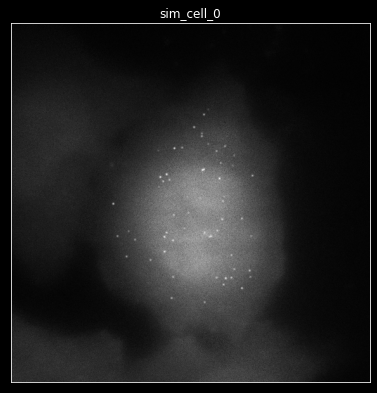

In [21]:
# Showing the simulated images
rsp.VisualizerImage(list_videos,list_files_names=list_files_names,selected_channel =1,selected_time_point= 0,normalize=0,individual_figure_size=7).plot()
del list_videos

In [22]:
list_DataFrame_particles_intensities, list_array_intensities, list_time_vector, list_selected_mask = rsp.image_processing( files_dir_path_processing=video_path,
                                                                                                                            particle_size=particle_detection_size,
                                                                                                                            selected_channel_tracking = selected_channel_tracking,
                                                                                                                            selected_channel_segmentation = selected_channel_segmentation,
                                                                                                                            intensity_calculation_method =intensity_calculation_method, 
                                                                                                                            mask_selection_method = mask_selection_method,
                                                                                                                            show_plot=show_plot,
                                                                                                                            use_optimization_for_tracking=use_optimization_for_tracking,
                                                                                                                            real_positions_dataframe = list_dataframe_simulated_cell,
                                                                                                                            average_cell_diameter=average_cell_diameter,
                                                                                                                            print_process_times=True,
                                                                                                                            min_percentage_time_tracking=min_percentage_time_tracking,
                                                                                                                            dataframe_format=dataframe_format)

mask time: 9  sec
The number of detected trajectories is:  76
The selected intensity threshold is:  228.0 

tracking time: 7  sec
intensity calculation time: 5  sec
76
Progress:  1 / 1
Time to process data: 22  sec


In [23]:
df = list_dataframe_simulated_cell[0]
df.head()

,image_number,cell_number,particle,frame,red_int_mean,green_int_mean,blue_int_mean,red_int_std,green_int_std,blue_int_std,...,background_int_mean_red,background_int_mean_green,background_int_mean_blue,background_int_std_red,background_int_std_green,background_int_std_blue,SSA_Ch0_UMP,SSA_Ch1_UMP,SSA_Ch2_UMP,Classification
0,0,0,0,0,203.45,1227.28,0.0,274.39,1439.54,0.0,...,1947.03,9194.64,0.0,114.40,687.34,0.0,10.647365,4.1,0.0,1
1,0,0,0,1,127.41,1087.04,0.0,195.36,1509.28,0.0,...,1946.91,9185.32,0.0,115.71,620.69,0.0,6.545314,4.3,0.0,1
2,0,0,0,2,197.49,1060.54,0.0,257.42,1336.78,0.0,...,1947.75,9340.98,0.0,102.24,597.51,0.0,9.554256,4.3,0.0,1
3,0,0,0,3,270.18,1276.38,0.0,289.30,1527.75,0.0,...,1957.82,9331.62,0.0,111.60,648.62,0.0,10.978250,4.3,0.0,1
4,0,0,0,4,176.43,1212.75,0.0,275.98,1624.33,0.0,...,1974.77,9352.45,0.0,125.18,685.22,0.0,7.020041,4.3,0.0,1


# Figure 1.

In [27]:
df_zero = df[['y','x','particle']][(df["frame"] == 0) ]
selected_trajectory = df_zero['particle'].loc[ df_zero[['x']].idxmax()  ].values[0] # This selects the spots that is more to the right side of the image
spot_size_crop = spot_size+2
selected_color = 'royalblue'
number_bins = 20
number_selected_spots =30
selected_channel =1

In [28]:
position_selected_spot = df[['y','x']][(df["frame"] == 0) & (df["particle"] == selected_trajectory)].values[0]

In [29]:
# crops
spot_range = np.linspace(-(spot_size_crop - 1) / 2, (spot_size_crop - 1) / 2, spot_size_crop,dtype=int)

def return_crop(image, y, x,spot_range):
    crop_image = image[y+spot_range[0]:y+(spot_range[-1]+1), x+spot_range[0]:x+(spot_range[-1]+1)].copy()
    return crop_image

crop_array = np.zeros(( spot_size_crop, spot_size_crop*number_selected_spots ))
time_array_crops = np.linspace(0, simulation_time_in_sec-1, number_selected_spots,dtype=int)

counter = 0
for i,time_crop in enumerate (time_array_crops):
    position_selected_spot_crop = df[['y','x']][(df["frame"] == time_crop) & (df["particle"] == selected_trajectory)].values[0].astype('int')
    crop_array[:spot_size_crop, counter:spot_size_crop+counter] = return_crop (image[time_crop,:,:,selected_channel],position_selected_spot_crop[0],position_selected_spot_crop[1], spot_range)
    counter += spot_size_crop


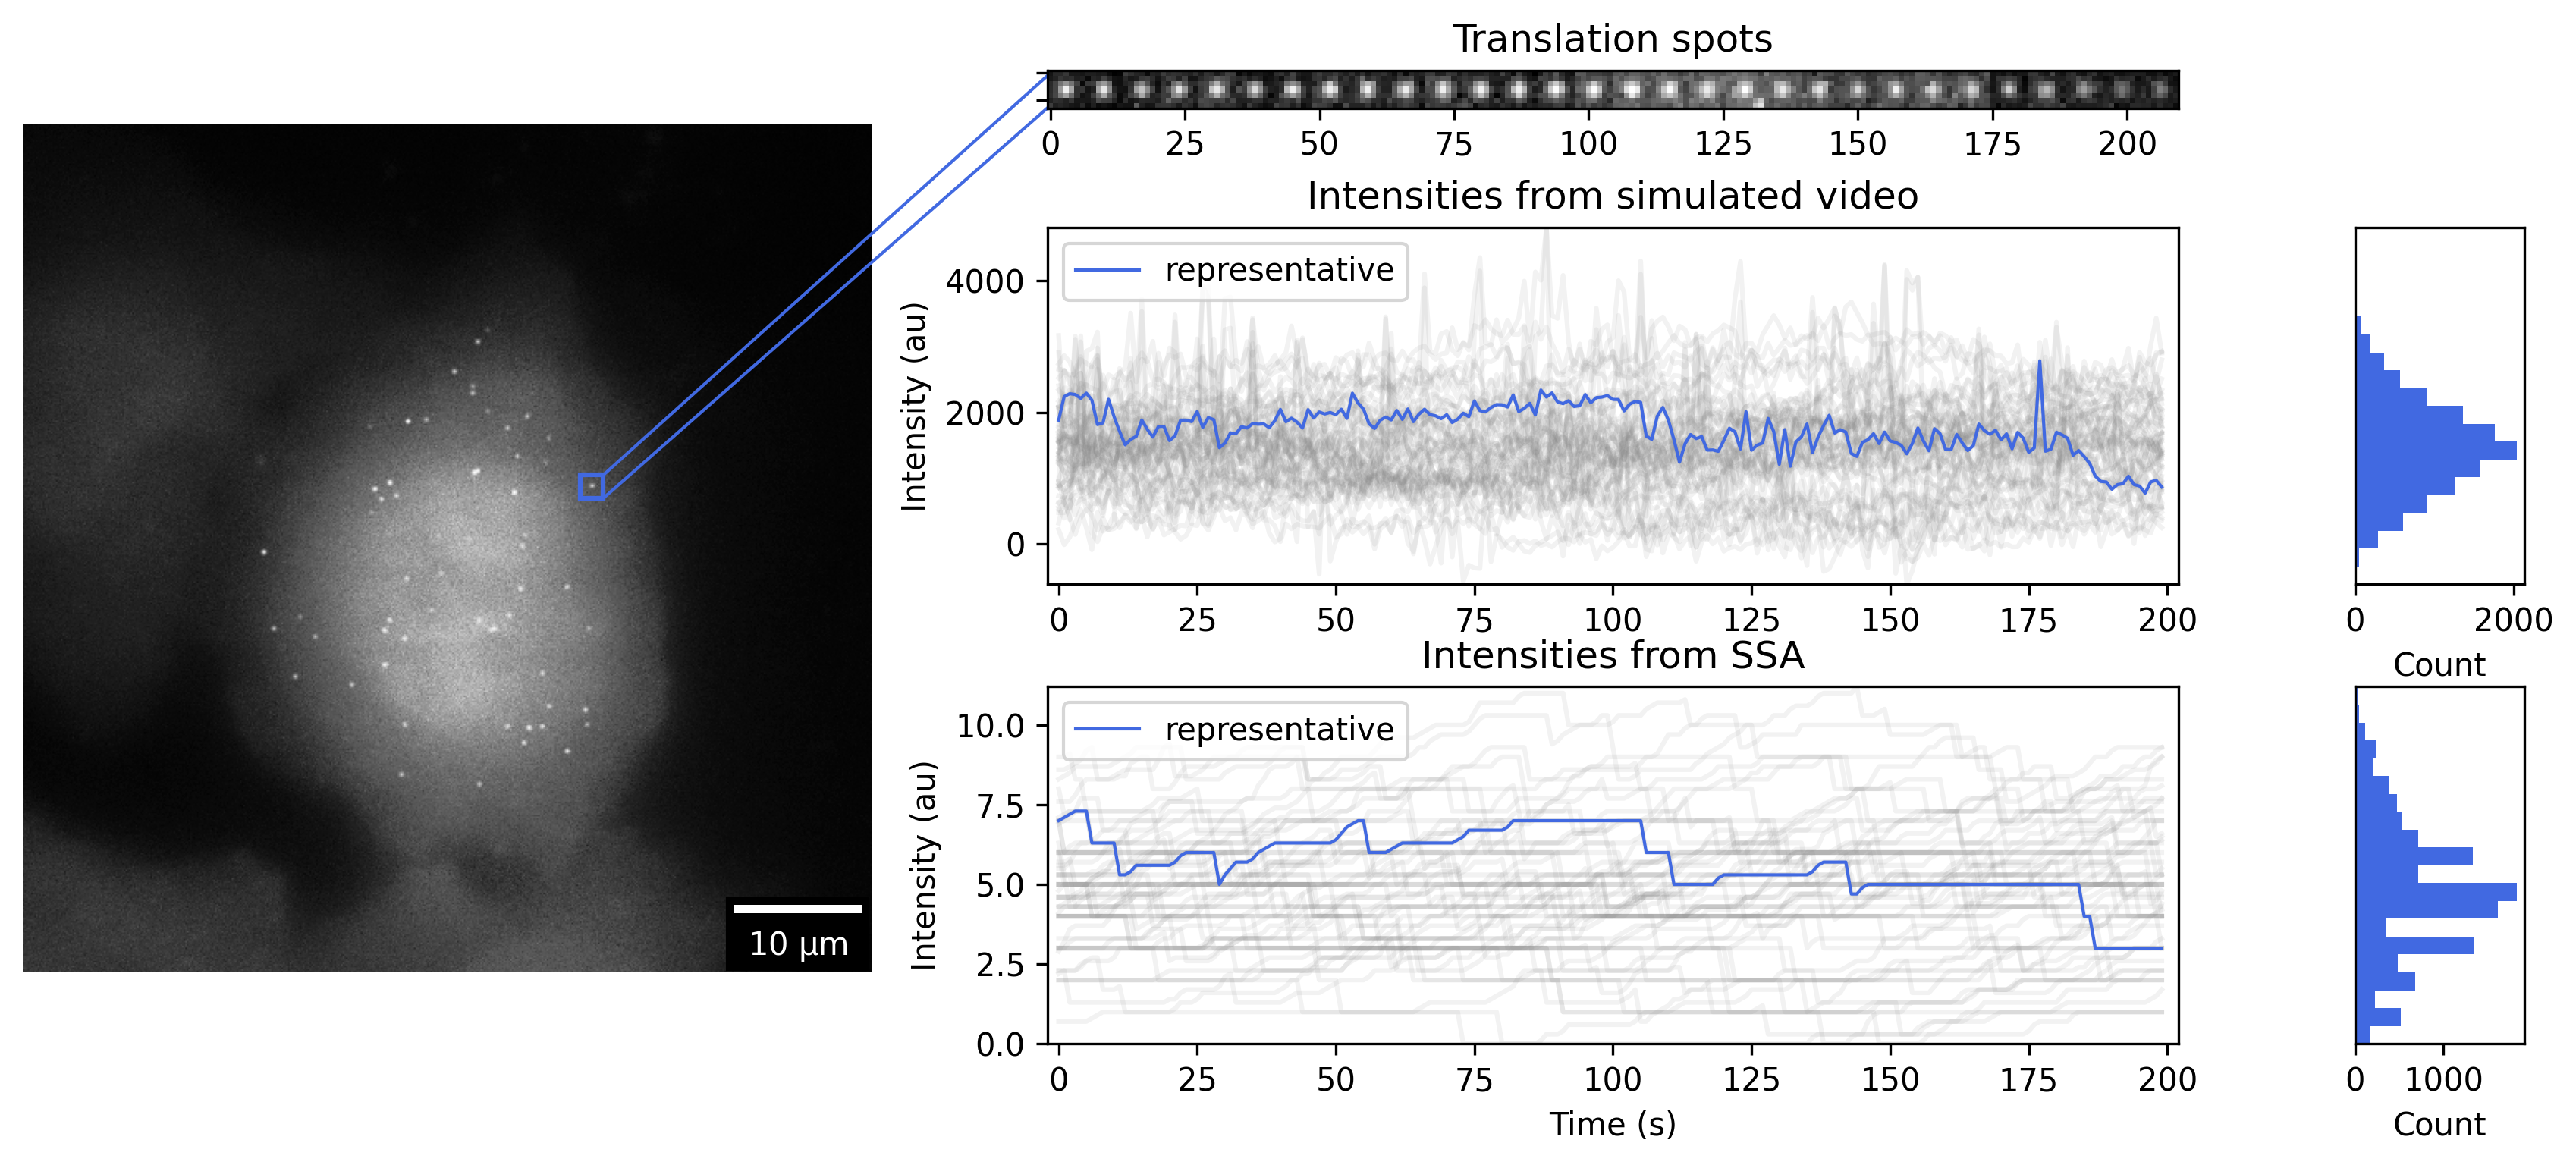

In [30]:
# Extracting Trajectories in image
df = list_dataframe_simulated_cell[0]
intensity_values_in_image = np.zeros((number_spots_per_cell,simulation_time_in_sec)) # pre-allocating memory for intensity
for i in range(number_spots_per_cell):
    intensity_values_in_image[i,:] = df[df['particle'] ==i].green_int_mean.values

ssa_ump = np.zeros((number_spots_per_cell,simulation_time_in_sec)) # pre-allocating memory for intensity
for i in range(number_spots_per_cell):
    ssa_ump[i,:] = df[df['particle'] ==i].SSA_Ch1_UMP.values

# Plotting
widths = [1.5, 2, 0.3]
heights = [0.2, 1, 1]
plt.style.use(['default'])

fig = plt.figure(figsize=(11, 5),constrained_layout=True,dpi=300)
plt.tight_layout() 
gs = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths,height_ratios=heights)

#simulated cell
f_ax1 = fig.add_subplot(gs[:, 0]); f_ax1.axis('off')
f_ax1.imshow(image[0,:,:,selected_channel],cmap='Greys_r')
f_ax1.add_patch(Rectangle((position_selected_spot[1]-7,position_selected_spot[0]-7), 14,14, fill=False,edgecolor=selected_color,lw=1.5))
scalebar = ScaleBar(dx = microns_per_pixel, units= 'um', length_fraction=0.2,location='lower right',box_color='k',color='w')
f_ax1.add_artist(scalebar)

# Crops
f_ax2 = fig.add_subplot(gs[0, 1:-1]); 
f_ax2.set_title('Translation spots')
f_ax2.imshow(crop_array,cmap='Greys_r')
f_ax2.set_yticklabels([])

# connections
connection_top = ConnectionPatch(xyA=(position_selected_spot[1]+spot_size_crop, position_selected_spot[0]-spot_size_crop), xyB=(0,0), coordsA="data", coordsB="data", axesA=f_ax1, axesB=f_ax2, color=selected_color)
f_ax1.add_artist(connection_top)
connection_bottom = ConnectionPatch(xyA=(position_selected_spot[1]+spot_size_crop, position_selected_spot[0]+spot_size_crop), xyB=(0,spot_size_crop-1), coordsA="data", coordsB="data", axesA=f_ax1, axesB=f_ax2, color=selected_color)
f_ax1.add_artist(connection_bottom)

# trajectories image
f_ax3 = fig.add_subplot(gs[1, 1])
f_ax3.plot(intensity_values_in_image.T,'grey',alpha = .1)
f_ax3.plot(intensity_values_in_image[selected_trajectory,:].T,'-', linewidth = 1, color = selected_color,label = 'representative')
#f_ax3.set_xlabel('Time (s)')
f_ax3.set_ylabel('Intensity (au)')
f_ax3.set_ylim((intensity_values_in_image.min(),intensity_values_in_image.max()))
f_ax3.set_title('Intensities from simulated video', color ='k')
#f_ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
f_ax3.set_xlim((-2,simulation_time_in_sec+2))
f_ax3.legend()

# dist image
f_ax4 = fig.add_subplot(gs[1, -1])
f_ax4.hist(intensity_values_in_image[:,:].flatten() , bins = number_bins, color = selected_color, orientation = 'horizontal')
f_ax4.set_ylim((intensity_values_in_image.min(),intensity_values_in_image.max()))
f_ax4.set_xlabel('Count')
f_ax4.set_yticklabels([]); f_ax4.set_yticks([])

#trajectories SSA
f_ax5 = fig.add_subplot(gs[2, 1])
f_ax5.plot(ssa_ump.T,'grey',alpha = .1)
f_ax5.plot(ssa_ump[selected_trajectory,:],'-', linewidth = 1, color = selected_color,label = 'representative')
f_ax5.set_xlabel('Time (s)')
f_ax5.set_ylabel('Intensity (au)')
f_ax5.set_ylim((ssa_ump.min(),ssa_ump.max()))
f_ax5.set_xlim((-2,simulation_time_in_sec+2))
f_ax5.set_title('Intensities from SSA', color ='k')
f_ax5.legend()

# Dist SSA
f_ax6 = fig.add_subplot(gs[-1, -1])
f_ax6.hist(ssa_ump[:,:].flatten() , bins = number_bins, color = selected_color, orientation = 'horizontal')
f_ax6.set_ylim((ssa_ump.min(),ssa_ump.max()))
f_ax6.set_xlabel('Count')
f_ax6.set_yticklabels([]); f_ax6.set_yticks([])

plt.subplots_adjust(left=1,right=10,wspace=0.0001, hspace=0.5)

name_figure = 'sim_cell.pdf'
#figure_directory = str(dropbox_address.joinpath(name_figure ) )
plt.tight_layout(pad=0.02) 
#plt.savefig(name_figure, transparent=True,dpi=300, format = 'pdf')
plt.show()